In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 

%matplotlib inline 

In [2]:
pokemone = pd.read_csv("pokemon.csv")

pokemone.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [3]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
base_color = sb.color_palette()[1]

**I will choose the second one it's my favourite** 

In [5]:
pokemone.generation_id.dtype

dtype('int64')

**`generation_id` looks like it's an integer column though it's a categorical column** 

## Now to our plots

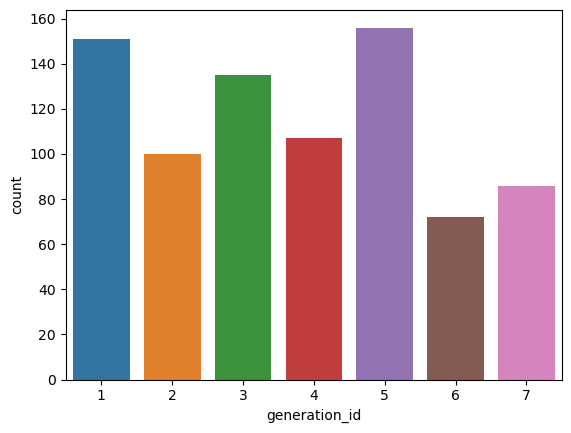

In [6]:
sb.countplot(data = pokemone, x = "generation_id");

**Let's fix a few things**

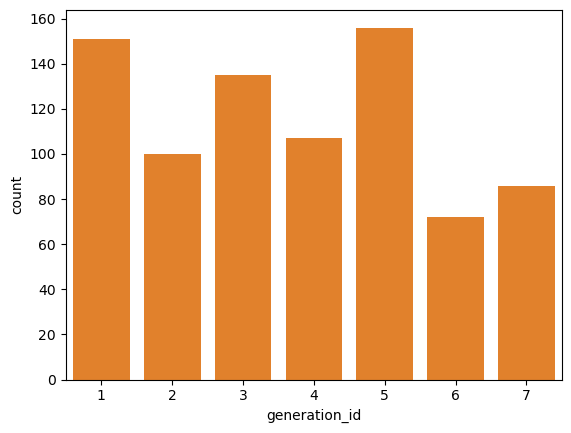

In [7]:
sb.countplot(data = pokemone, x = "generation_id", color = base_color);

In [8]:
pokemone.generation_id.value_counts()

generation_id
5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: count, dtype: int64

In [9]:
Order_ID = list(pokemone.generation_id.value_counts().index)
Order_ID

[5, 1, 3, 4, 2, 7, 6]

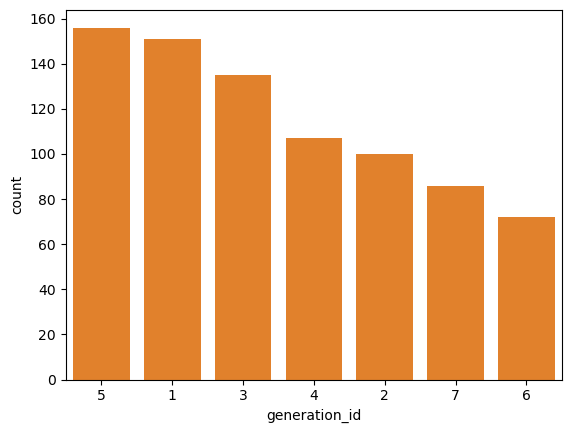

In [10]:
sb.countplot(data = pokemone, x = "generation_id", color = base_color, order = Order_ID);

**Since our column is Norminal** 

## Let's check out matplotlib

In [11]:
x = pokemone["generation_id"].unique()

y = pokemone["generation_id"].value_counts(sort = False)

In [12]:
x, y

(array([1, 2, 3, 4, 5, 6, 7]),
 generation_id
 1    151
 2    100
 3    135
 4    107
 5    156
 6     72
 7     86
 Name: count, dtype: int64)

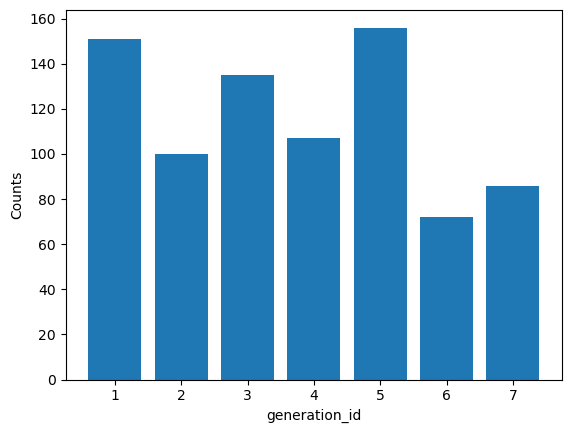

In [13]:
plt.bar(x, y)

plt.xlabel("generation_id")
plt.ylabel("Counts");

## Let's use another column 

In [14]:
pokemone.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [15]:
pokemone.type_1.dtype

dtype('O')

<Axes: xlabel='type_1', ylabel='count'>

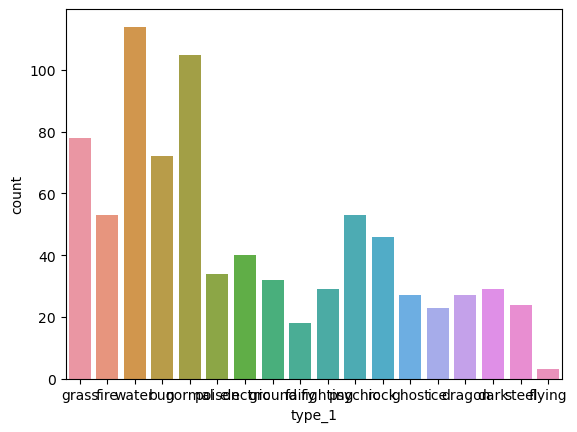

In [16]:
sb.countplot(data = pokemone, x = "type_1")

**Let's clean it up abit**

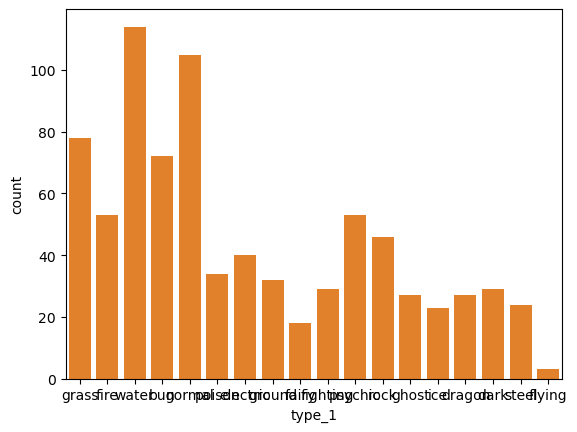

In [17]:
sb.countplot(data = pokemone, x = "type_1", color = base_color);

In [18]:
pokemone.type_1.value_counts()

type_1
water       114
normal      105
grass        78
bug          72
fire         53
psychic      53
rock         46
electric     40
poison       34
ground       32
dark         29
fighting     29
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64

In [19]:
Order_type1 = pokemone.type_1.value_counts().index

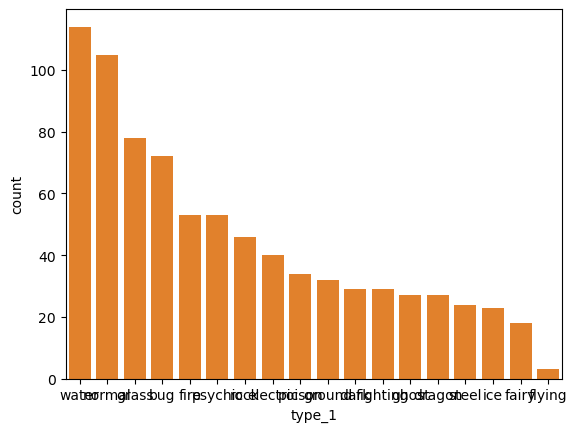

In [20]:
sb.countplot(data = pokemone, x = "type_1", color = base_color, order = Order_type1);

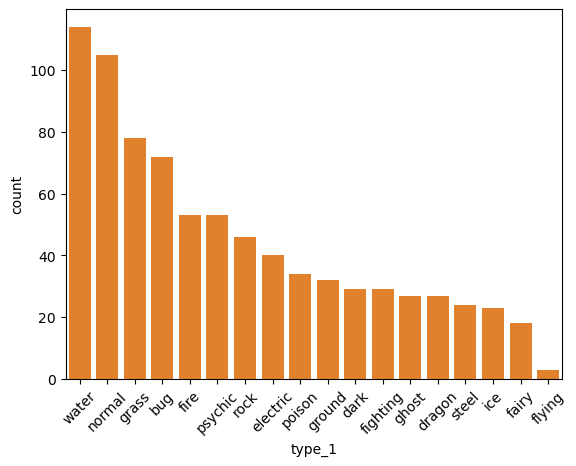

In [21]:
sb.countplot(data = pokemone, x = "type_1", color = base_color, order = Order_type1)

plt.xticks(rotation = 45);

**What if we change x to y as an argunts in seaborn** 

<Axes: xlabel='count', ylabel='type_1'>

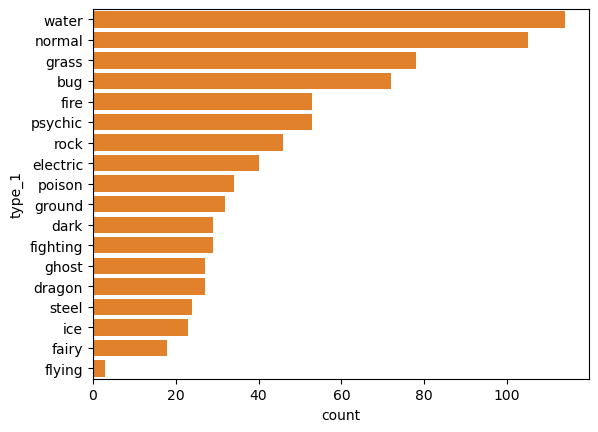

In [22]:
sb.countplot(data = pokemone,  y = "type_1", color = base_color, order = Order_type1)

**Nice we still convay the sam info but we changed out axis**

**It seems that our water and normal pokemon are quite common than flying pokemone**